In [5]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2,3)] # 2 é comrpimento da petula, 3 é largura da petula
y = (iris["target"] == 2).astype(int) # Iris virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [8]:
svm_clf.predict([[4, 3]])

array([1])

In [9]:
from  sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_clf.fit(X, y)

c:\Users\LIS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [13]:
polynomial_svm_clf.predict([[10,2]])

array([1])

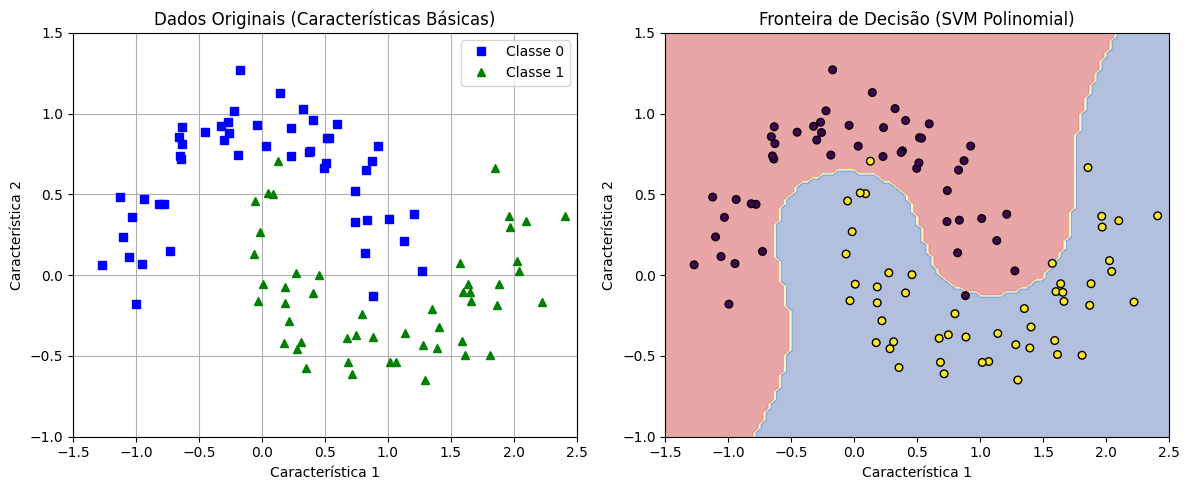

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC

# 1. Seus dados e modelo (adicionei random_state para reprodutibilidade)
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter=10000, random_state=42))
])

polynomial_svm_clf.fit(X, y)

# 2. Função para plotar a fronteira de decisão
def plot_decision_boundary(clf, X, y, axes):
    """Cria uma malha de pontos, faz previsões e plota as regiões coloridas."""
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_new).reshape(x0.shape)
    
    # Plota as áreas de decisão coloridas
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.RdYlBu, alpha=0.4)
    # Plota os pontos de dados
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k')
    plt.xlabel("Característica 1")
    plt.ylabel("Característica 2")

# 3. Criação da figura com dois subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico da Esquerda: Características básicas
plt.sca(axes[0])
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Classe 0")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Classe 1")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.title("Dados Originais (Características Básicas)")
plt.grid(True)
plt.legend()
plt.axis([-1.5, 2.5, -1, 1.5])

# Gráfico da Direita: Com fronteira de decisão polinomial
plt.sca(axes[1])
plot_decision_boundary(polynomial_svm_clf, X, y, axes=[-1.5, 2.5, -1, 1.5])
plt.title("Fronteira de Decisão (SVM Polinomial)")

plt.tight_layout()
plt.show()

In [16]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [19]:
test = X[:1]
y[:1]

array([1])

In [20]:
poly_kernel_svm_clf.predict(test)

array([1])

In [21]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [23]:
y_pred = rbf_kernel_svm_clf.predict(X)

In [24]:
from sklearn.metrics import accuracy_score, f1_score
print(accuracy_score(y, y_pred))
print(f1_score(y, y_pred))

0.97
0.9702970297029703


In [30]:
from sklearn.svm import LinearSVR

y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])